# ML@LSE Give It A Go Session 
# Training a Support Vector Classifier on the MNIST Dataset

## 1. Import packages and load data

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import time
import datetime as dt
import itertools

# Import datasets, classifiers and performance metrics
from sklearn import datasets, svm, metrics
#fetch original mnist dataset
from sklearn.datasets import fetch_mldata

In [2]:
# This downloads the canonical mnist dataset from the online database and may take awhile
mnist = fetch_mldata('MNIST original', data_home='./')

In [3]:
#The Mnist object contains: data, COL_NAMES, DESCR, target fields
mnist

{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [4]:
images = mnist.data
targets = mnist.target
print(images)
print(targets)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[0. 0. 0. ... 9. 9. 9.]


### This is just 1s and 0s, how do I know this is actually a image?
### Therefore we neeed to define some helper function to visualise this data:

In [5]:
def show_some_digits(images, targets, sample_size=24, title_text='Digit {}' ):
    '''
    Visualize random digits in a grid plot
    images - array of flatten gidigs [:,784]
    targets - final labels
    '''
    nsamples=sample_size
    rand_idx = np.random.choice(images.shape[0],nsamples)
    images_and_labels = list(zip(images[rand_idx], targets[rand_idx]))


    img = plt.figure(1, figsize=(15, 12), dpi=160)
    for index, (image, label) in enumerate(images_and_labels):
        plt.subplot(np.ceil(nsamples/6.0), 6, index + 1)
        plt.axis('off')
        #each image is flat, we have to reshape to 2D array 28x28-784
        plt.imshow(image.reshape(28,28), cmap=plt.cm.gray_r, interpolation='nearest')
        plt.title(title_text.format(label))

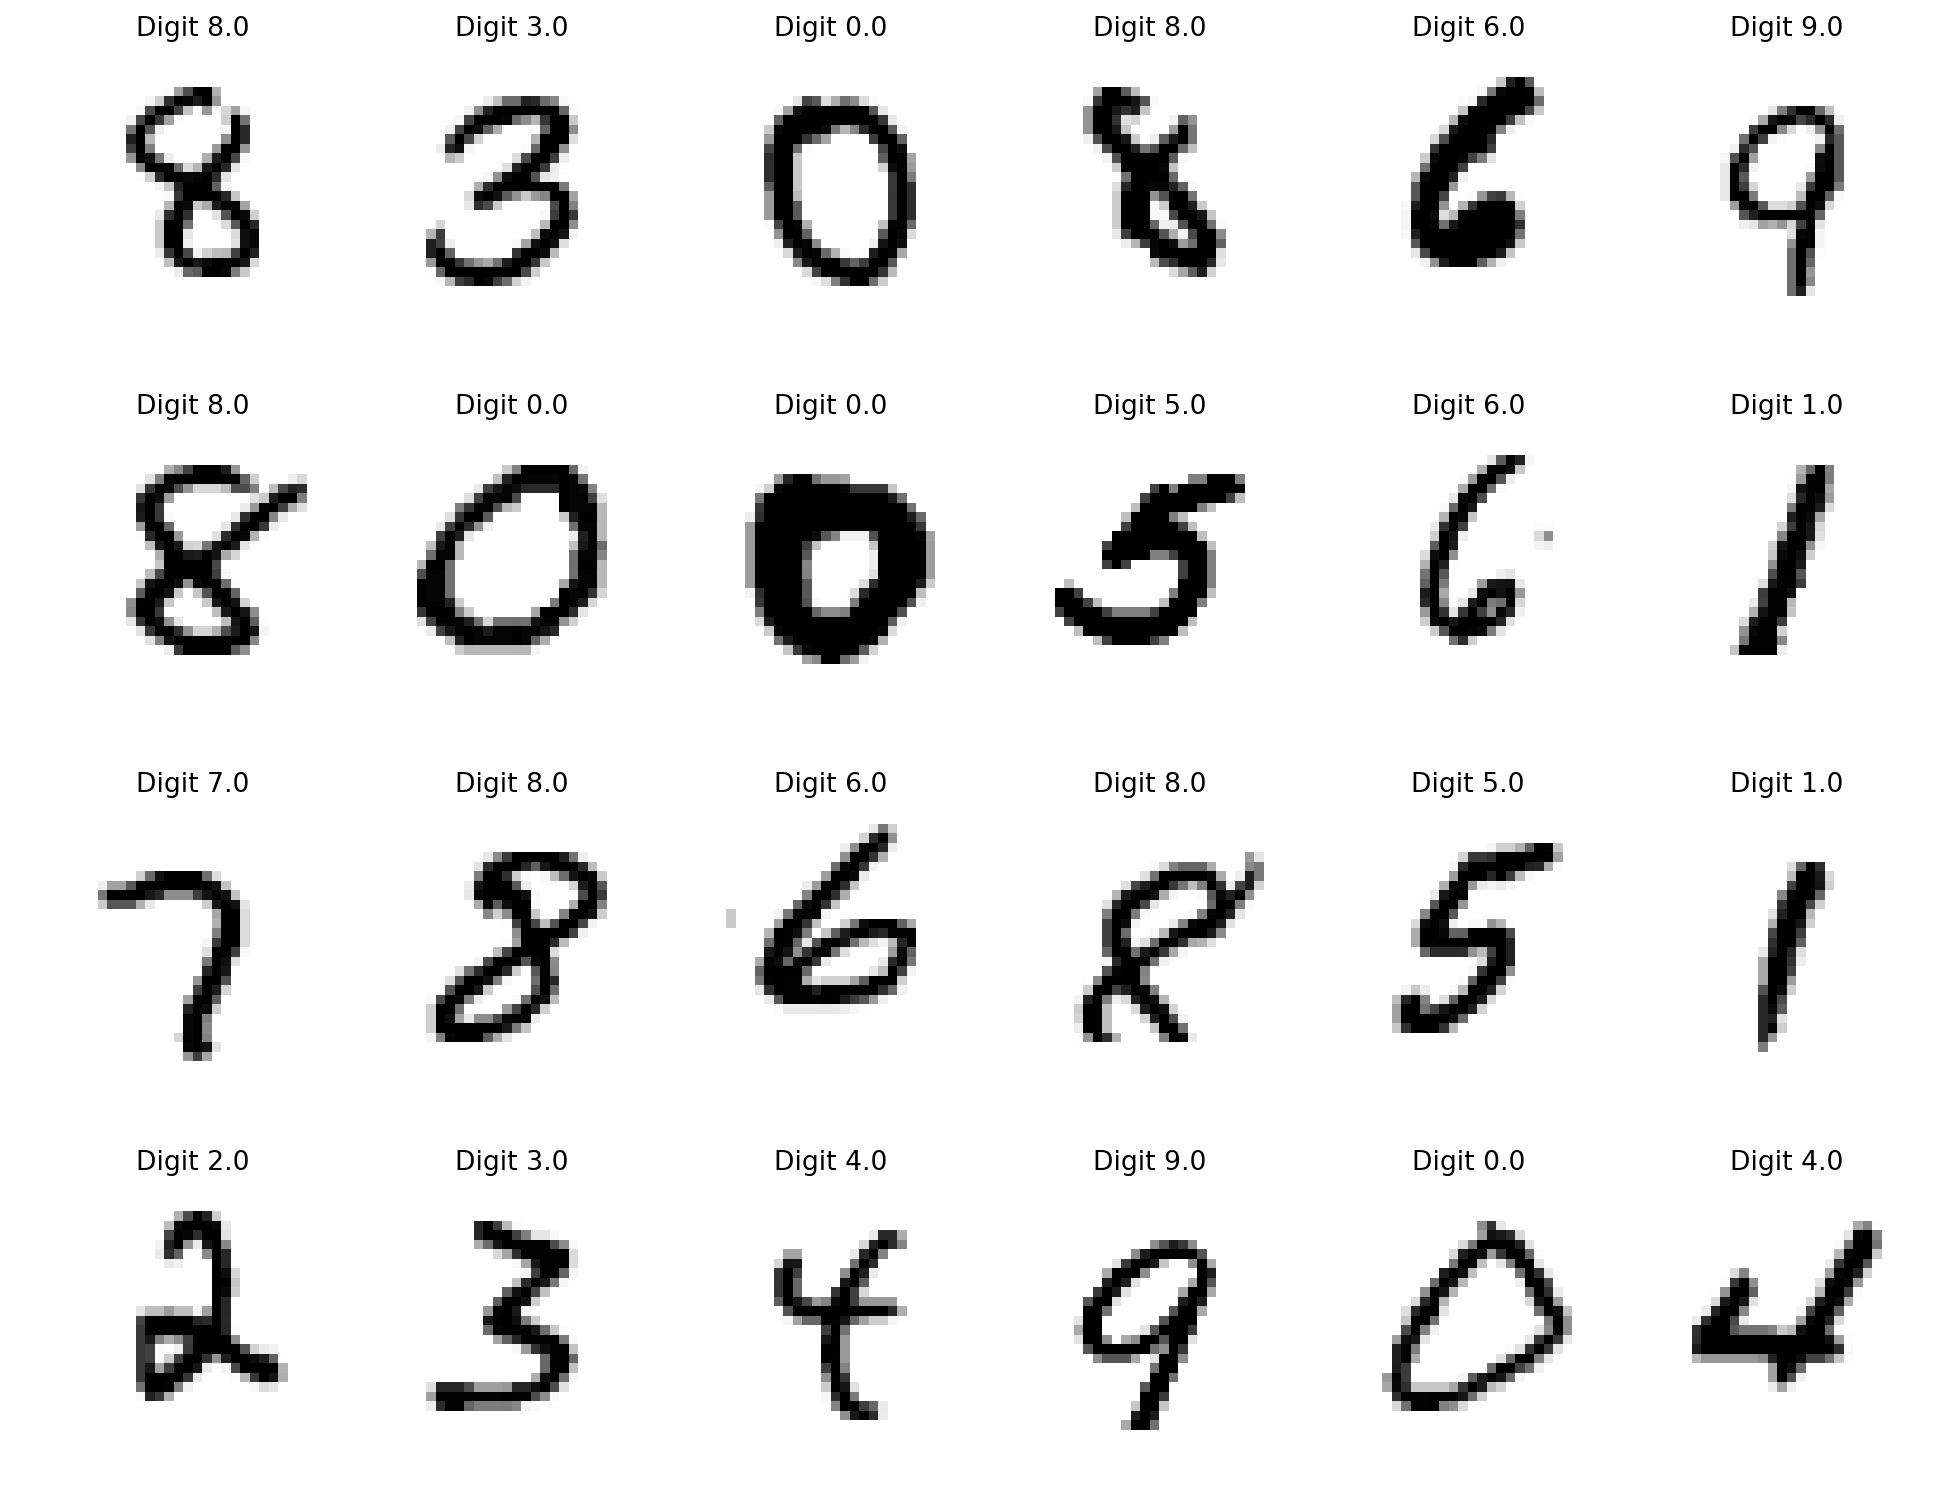

In [6]:
show_some_digits(images,targets)

##  2. Data Preprocessing and Train Test Split

- Because of time limitations, we are only going to subset a portion of the 70000 data points and use 10000
- Before training a model, one good practice is to scale the dataso we divide the images numpy array by 255

In [7]:

rand_idx = np.random.choice(images.shape[0],10000)
print('The image indexes that we are going to use for training are:' + str(rand_idx))
X_data =images[rand_idx]/255.0
print('The dimensionality of the training data is ' + str(X_data.shape))
Y  = targets[rand_idx]

The image indexes that we are going to use for training are:[18131 52456  2074 ... 35804 29054 56461]
The dimensionality of the training data is (10000, 784)


In [8]:
#Split data to train and test
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, Y, test_size=0.15, random_state=42)

## 3. Training the Support Vector Classifier

- There are some parameters for the SVC which has to be trained, but someone has already done the good work for us.
- Finding these parameters is computationally intensive and may take up to 2 days,  but we don't have that luxury of time
- The following training should take about 1 minute on a 4 core Macbook Pro

In [9]:
param_C = 5 # optimal parameters chosen by other people 
param_gamma = 0.05 # optimal paremeters chosen by other people
classifier = svm.SVC(C=param_C,gamma=param_gamma)

#We learn the digits on train part
start_time = dt.datetime.now()
print('Start learning at {}'.format(str(start_time)))
classifier.fit(X_train, y_train)
end_time = dt.datetime.now() 
print('Stop learning {}'.format(str(end_time)))
elapsed_time= end_time - start_time
print('Elapsed learning {}'.format(str(elapsed_time)))

Start learning at 2018-09-18 11:54:32.495550
Stop learning 2018-09-18 11:55:29.193755
Elapsed learning 0:00:56.698205


## 4. Testing our Classiifer on the Test Set

Classification report for classifier SVC(C=5, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.05, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98       150
        1.0       1.00      0.97      0.99       140
        2.0       0.98      0.99      0.98       162
        3.0       0.97      0.99      0.98       171
        4.0       0.93      0.98      0.95       142
        5.0       0.99      0.95      0.97       149
        6.0       0.99      0.99      0.99       141
        7.0       0.99      0.95      0.97       151
        8.0       0.96      0.96      0.96       139
        9.0       0.94      0.93      0.93       155

avg / total       0.97      0.97      0.97      1500




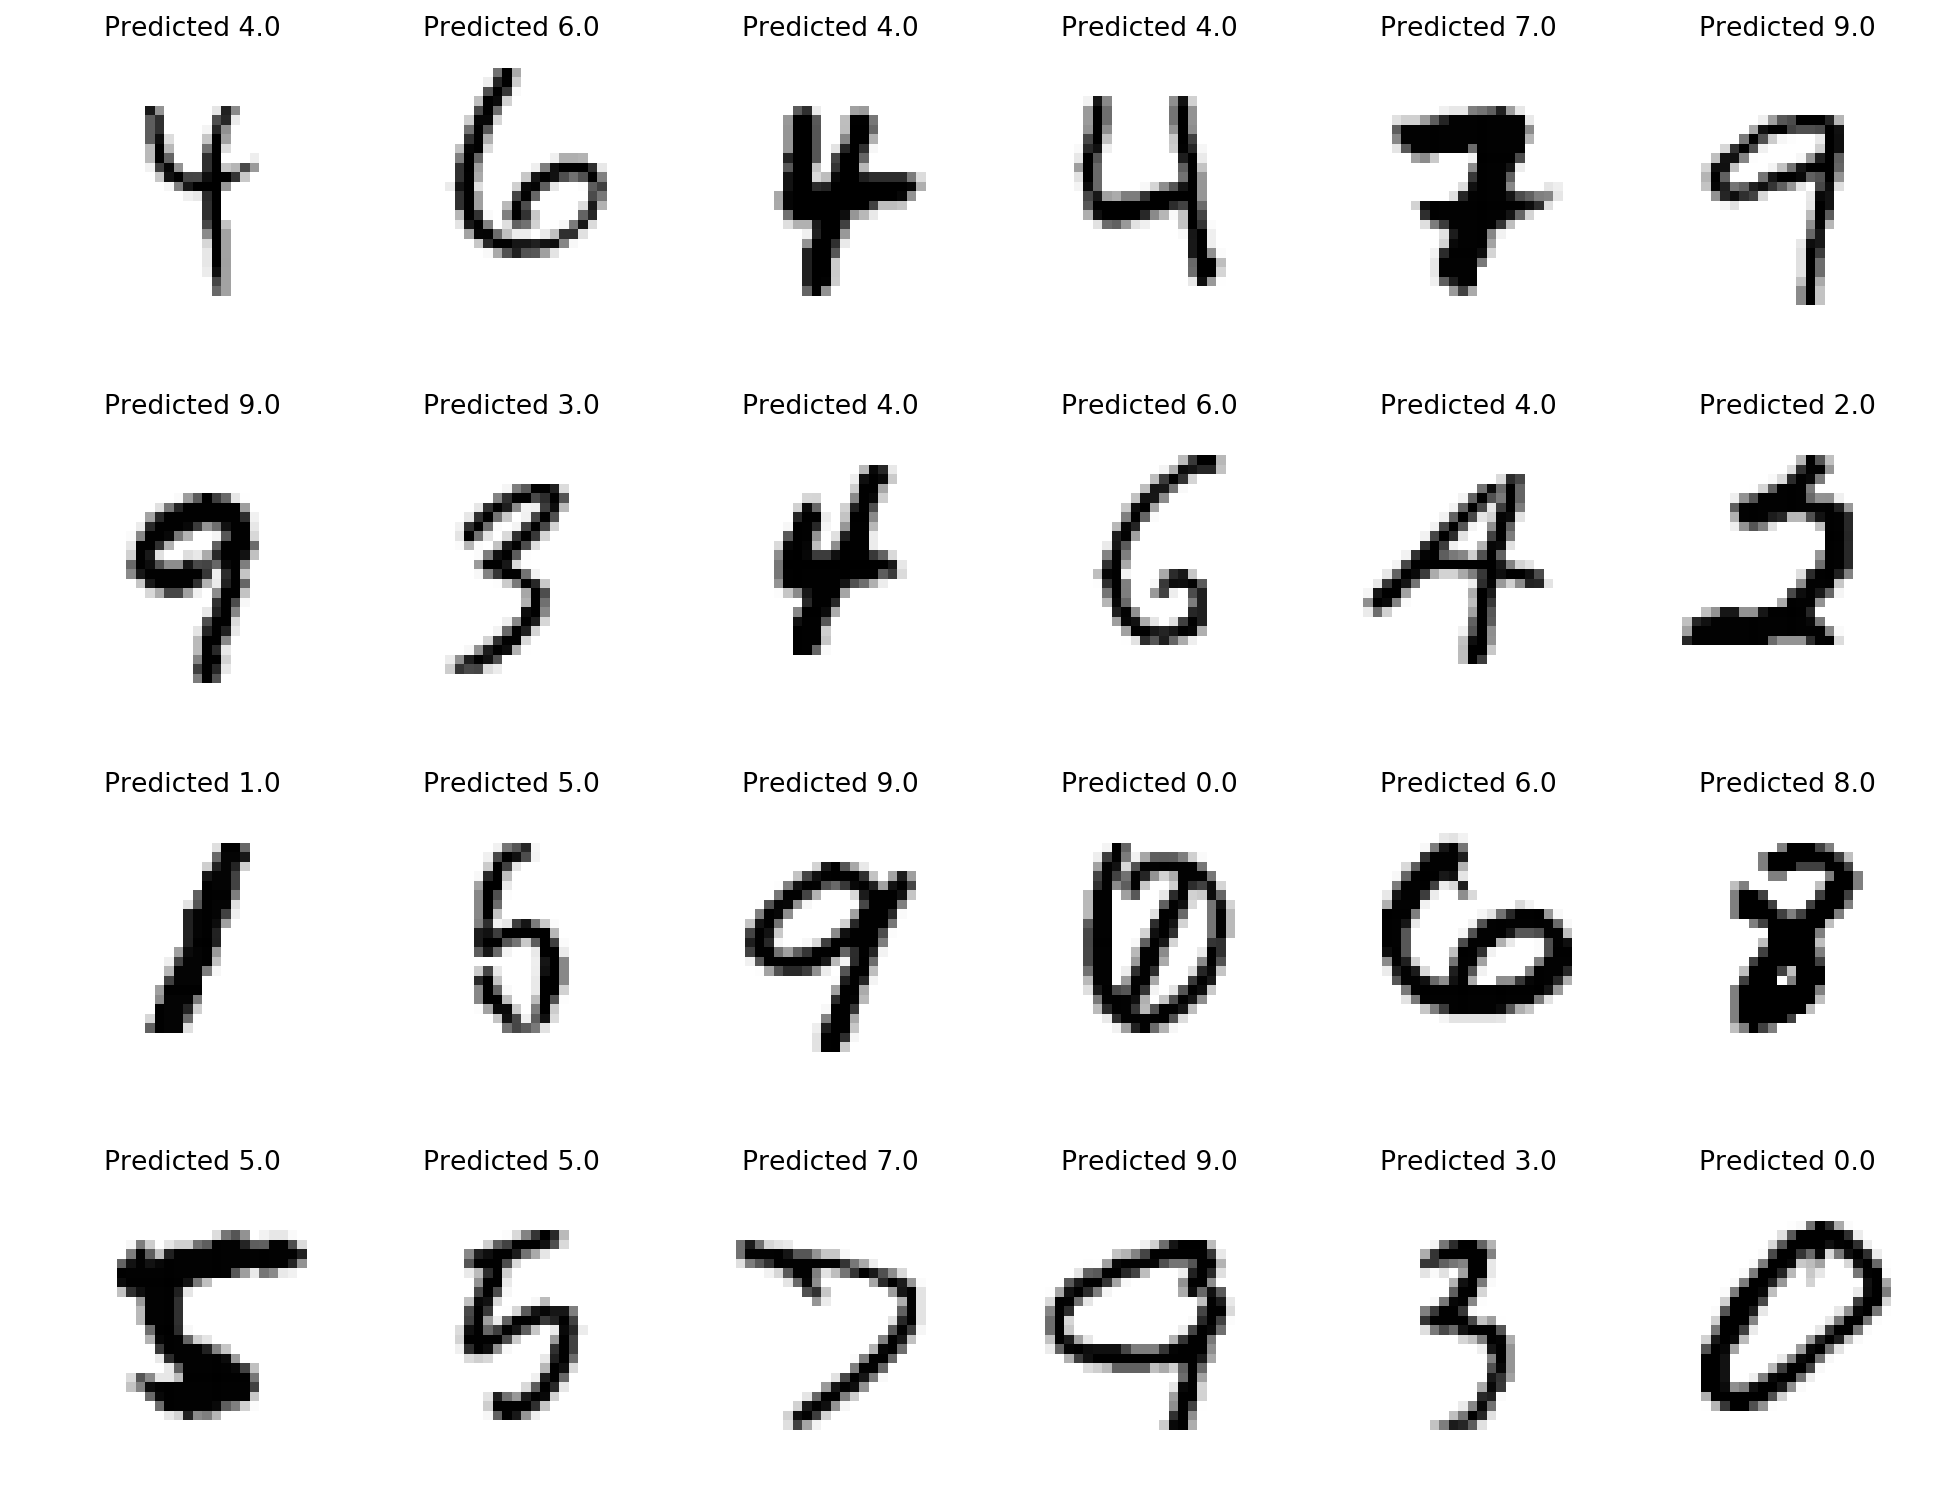

In [10]:
expected = y_test
predicted = classifier.predict(X_test)

show_some_digits(X_test,predicted,title_text="Predicted {}")

print("Classification report for classifier %s:\n%s\n"
      % (classifier, metrics.classification_report(expected, predicted)))

##  5. Confusion Matrix helps us to better evaluate the performance of our model 

In [11]:
cm = metrics.confusion_matrix(expected, predicted)
print("Confusion matrix:\n%s" % cm)

Confusion matrix:
[[149   0   0   0   0   0   0   1   0   0]
 [  0 136   2   0   0   0   0   1   1   0]
 [  1   0 160   1   0   0   0   0   0   0]
 [  0   0   1 169   0   0   0   0   1   0]
 [  0   0   0   0 139   0   0   0   0   3]
 [  0   0   0   1   2 141   1   0   3   1]
 [  0   0   0   0   1   0 140   0   0   0]
 [  0   0   0   0   4   0   0 143   0   4]
 [  1   0   0   2   0   1   0   0 133   2]
 [  3   0   1   2   4   1   0   0   0 144]]


In [12]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

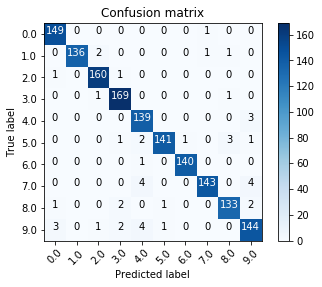

In [13]:
plot_confusion_matrix(cm,classifier.classes_)